In [3]:
pip install pandas-datareader

     |████████████████████████████████| 109 kB 6.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [80]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

/Users/user/Downloads/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2023-12-05 21:58:59.131660: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pdr.get_data_tiingo("TSLA", api_key = "e3c3d29adb785638442729977a2229890160912d")

/Users/user/Downloads/anaconda3/lib/python3.9/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [3]:
df.to_csv("TSLA.csv")

In [4]:
df = pd.read_csv("TSLA.csv")

In [5]:
df2 = df.reset_index()["close"]

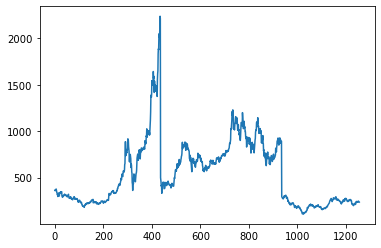

In [6]:
plt.plot(df2)

In [7]:
scaler = MinMaxScaler(feature_range=(0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [8]:
print(df2)

[[0.11966301]
 [0.11727407]
 [0.12064393]
 ...
 [0.06194354]
 [0.06135686]
 [0.05983151]]


In [9]:
training_size = int(len(df2)*0.65)
test_size = len(df2) - training_size
train, test = df2[0:training_size], df2[training_size:len(df2)]

In [10]:
training_size, test_size

(817, 440)

In [11]:
train

array([[0.11966301],
       [0.11727407],
       [0.12064393],
       [0.12139957],
       [0.12132448],
       [0.12610706],
       [0.12090677],
       [0.11279187],
       [0.10744608],
       [0.10554056],
       [0.09728487],
       [0.09934527],
       [0.08790275],
       [0.1023115 ],
       [0.09763687],
       [0.10596297],
       [0.10546077],
       [0.09481614],
       [0.09023537],
       [0.09836904],
       [0.10647455],
       [0.10665759],
       [0.1081501 ],
       [0.11117265],
       [0.11224744],
       [0.10621172],
       [0.1109192 ],
       [0.11167953],
       [0.1122709 ],
       [0.09112712],
       [0.08955952],
       [0.0842419 ],
       [0.08608171],
       [0.08867716],
       [0.0883674 ],
       [0.08887429],
       [0.09418253],
       [0.09336118],
       [0.09579706],
       [0.09611621],
       [0.10008683],
       [0.09814845],
       [0.09359116],
       [0.09278859],
       [0.09609274],
       [0.09560932],
       [0.09390092],
       [0.091

In [12]:
def prev_100(data, time_step = 1):
    datax, datay = [], []
    for i in range(len(data)-time_step-1):
        a = data[i:(i+time_step), 0]
        datax.append(a)
        datay.append(data[i+time_step, 0])
    return np.array(datax), np.array(datay) 

In [13]:
time_step = 100
xtrain, ytrain = prev_100(train, time_step)
xtest, ytest = prev_100(test, time_step)

In [14]:
train[0:(0+100), 0].shape

(100,)

In [15]:
xtrain.shape

(716, 100)

In [16]:
ytrain.shape

(716,)

In [17]:
xtest.shape

(339, 100)

In [18]:
ytest.shape

(339,)

In [19]:
xtrain =xtrain.reshape(xtrain.shape[0],xtrain.shape[1] , 1)
xtest = xtest.reshape(xtest.shape[0],xtest.shape[1] , 1)
# xtrain[1]

In [20]:
# xtrain.reshape(xtrain.shape[0],xtrain.shape[1] , 1)

In [21]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100, 1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "adam")

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 189ms/step - loss: 0.0286 - val_loss: 0.0049
Epoch 2/100
12/12 [==============================] - 1s 102ms/step - loss: 0.0116 - val_loss: 0.0140
Epoch 3/100
12/12 [==============================] - 1s 103ms/step - loss: 0.0091 - val_loss: 0.0023
Epoch 4/100
12/12 [==============================] - 1s 103ms/step - loss: 0.0080 - val_loss: 0.0030
Epoch 5/100
12/12 [==============================] - 1s 106ms/step - loss: 0.0071 - val_loss: 0.0016
Epoch 6/100
12/12 [==============================] - 1s 106ms/step - loss: 0.0067 - val_loss: 0.0024
Epoch 7/100
12/12 [==============================] - 1s 114ms/step - loss: 0.0061 - val_loss: 0.0025
Epoch 8/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0065 - val_loss: 0.0026
Epoch 9/100
12/12 [==============================] - 1s 111ms/step - loss: 0.0057 - val_loss: 0.0024
Epoch 10/100
12/12 [==============================] - 1s 108ms/step - loss: 0.0056 - val_lo

12/12 [==============================] - 2s 165ms/step - loss: 0.0012 - val_loss: 7.2915e-04
Epoch 80/100
12/12 [==============================] - 2s 160ms/step - loss: 0.0012 - val_loss: 6.3822e-04
Epoch 81/100
12/12 [==============================] - 2s 163ms/step - loss: 0.0012 - val_loss: 6.1443e-04
Epoch 82/100
12/12 [==============================] - 2s 187ms/step - loss: 0.0014 - val_loss: 6.8907e-04
Epoch 83/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0014 - val_loss: 7.8253e-04
Epoch 84/100
12/12 [==============================] - 2s 168ms/step - loss: 0.0014 - val_loss: 6.4707e-04
Epoch 85/100
12/12 [==============================] - 2s 164ms/step - loss: 0.0012 - val_loss: 6.4971e-04
Epoch 86/100
12/12 [==============================] - 2s 165ms/step - loss: 0.0011 - val_loss: 7.8928e-04
Epoch 87/100
12/12 [==============================] - 2s 163ms/step - loss: 0.0011 - val_loss: 6.8173e-04
Epoch 88/100
12/12 [==============================] - 2s 16

In [26]:
pred_train = model.predict(xtrain)
pred_test = model.predict(xtest)

11/11 [==============================] - 0s 28ms/step


In [27]:
train_pred = scaler.inverse_transform(pred_train)
test_pred = scaler.inverse_transform(pred_test)

In [28]:
tf.__version__

'2.15.0'

In [31]:
math.sqrt(mean_squared_error(ytrain, train_pred))

739.9434814009514

In [32]:
math.sqrt(mean_squared_error(ytest, test_pred))

321.8756462791907

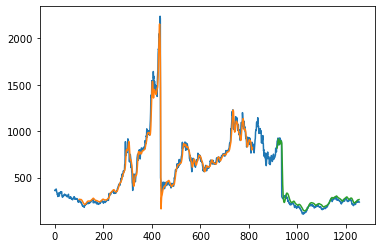

In [35]:
look_back=100
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_pred)+look_back, :] = train_pred

testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_pred)+(look_back*2)+1:len(df2)-1, :] = test_pred

plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test)

440

In [37]:
x_input=test[340:].reshape(1,-1)
x_input.shape

(1, 100)

In [38]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [39]:
temp_input

[0.08132729448759768,
 0.08555135756693966,
 0.08694060497970102,
 0.08596437706803087,
 0.07265388496468213,
 0.07130218477929269,
 0.07554502147232064,
 0.073770914978997,
 0.07333442846079836,
 0.06927932790463004,
 0.07431534977589,
 0.0747799967146176,
 0.07179499213854927,
 0.06852838335719147,
 0.07097364653978833,
 0.0684110482716542,
 0.06727993804707483,
 0.06645859244831388,
 0.06293384647877408,
 0.06441226855654378,
 0.06314974303616268,
 0.061793349447351736,
 0.058601835120737814,
 0.055147490202520355,
 0.05215309881960904,
 0.050402459343392866,
 0.057813343345927304,
 0.0587097833994321,
 0.06043226245511933,
 0.0572313613216624,
 0.061244221247037295,
 0.06135216952573158,
 0.06996925820758923,
 0.06983784291178748,
 0.07039166451552342,
 0.06425738624363457,
 0.06964541337150636,
 0.0675005280078849,
 0.0672987116607608,
 0.06589538403773497,
 0.07766643981883462,
 0.07480346373172506,
 0.07659634383873468,
 0.07882101706052144,
 0.07804660549597539,
 0.073770914978

In [40]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.07255135]
101
1 day input [0.08555136 0.0869406  0.08596438 0.07265388 0.07130218 0.07554502
 0.07377091 0.07333443 0.06927933 0.07431535 0.07478    0.07179499
 0.06852838 0.07097365 0.06841105 0.06727994 0.06645859 0.06293385
 0.06441227 0.06314974 0.06179335 0.05860184 0.05514749 0.0521531
 0.05040246 0.05781334 0.05870978 0.06043226 0.05723136 0.06124422
 0.06135217 0.06996926 0.06983784 0.07039166 0.06425739 0.06964541
 0.06750053 0.06729871 0.06589538 0.07766644 0.07480346 0.07659634
 0.07882102 0.07804661 0.07377091 0.07434351 0.07250839 0.06927463
 0.06419637 0.06518668 0.06383967 0.06214066 0.06490038 0.06670265
 0.06735034 0.06497078 0.07183723 0.07131626 0.07154155 0.07113792
 0.07299181 0.07269613 0.07076244 0.06712506 0.06843921 0.0688757
 0.06316382 0.05257081 0.04875977 0.04880201 0.05088588 0.04896158
 0.04583578 0.04655856 0.04189332 0.04352662 0.04578884 0.05181987
 0.05250041 0.05217657 0.05354235 0.05350949 0.04781639 0.05000821
 0.05426044 0.0606904  0.06323892 0

8 day output [[0.08702804]]
9 day input [0.06927933 0.07431535 0.07478    0.07179499 0.06852838 0.07097365
 0.06841105 0.06727994 0.06645859 0.06293385 0.06441227 0.06314974
 0.06179335 0.05860184 0.05514749 0.0521531  0.05040246 0.05781334
 0.05870978 0.06043226 0.05723136 0.06124422 0.06135217 0.06996926
 0.06983784 0.07039166 0.06425739 0.06964541 0.06750053 0.06729871
 0.06589538 0.07766644 0.07480346 0.07659634 0.07882102 0.07804661
 0.07377091 0.07434351 0.07250839 0.06927463 0.06419637 0.06518668
 0.06383967 0.06214066 0.06490038 0.06670265 0.06735034 0.06497078
 0.07183723 0.07131626 0.07154155 0.07113792 0.07299181 0.07269613
 0.07076244 0.06712506 0.06843921 0.0688757  0.06316382 0.05257081
 0.04875977 0.04880201 0.05088588 0.04896158 0.04583578 0.04655856
 0.04189332 0.04352662 0.04578884 0.05181987 0.05250041 0.05217657
 0.05354235 0.05350949 0.04781639 0.05000821 0.05426044 0.0606904
 0.06323892 0.05889752 0.05923075 0.05984089 0.0624692  0.05918851
 0.05977049 0.06006618 

18 day output [[0.10984145]]
19 day input [0.06441227 0.06314974 0.06179335 0.05860184 0.05514749 0.0521531
 0.05040246 0.05781334 0.05870978 0.06043226 0.05723136 0.06124422
 0.06135217 0.06996926 0.06983784 0.07039166 0.06425739 0.06964541
 0.06750053 0.06729871 0.06589538 0.07766644 0.07480346 0.07659634
 0.07882102 0.07804661 0.07377091 0.07434351 0.07250839 0.06927463
 0.06419637 0.06518668 0.06383967 0.06214066 0.06490038 0.06670265
 0.06735034 0.06497078 0.07183723 0.07131626 0.07154155 0.07113792
 0.07299181 0.07269613 0.07076244 0.06712506 0.06843921 0.0688757
 0.06316382 0.05257081 0.04875977 0.04880201 0.05088588 0.04896158
 0.04583578 0.04655856 0.04189332 0.04352662 0.04578884 0.05181987
 0.05250041 0.05217657 0.05354235 0.05350949 0.04781639 0.05000821
 0.05426044 0.0606904  0.06323892 0.05889752 0.05923075 0.05984089
 0.0624692  0.05918851 0.05977049 0.06006618 0.06505996 0.06384906
 0.06194354 0.06135686 0.05983151 0.07255135 0.07303867 0.07424125
 0.07596861 0.07800664

28 day output [[0.13079414]]
29 day input [0.05723136 0.06124422 0.06135217 0.06996926 0.06983784 0.07039166
 0.06425739 0.06964541 0.06750053 0.06729871 0.06589538 0.07766644
 0.07480346 0.07659634 0.07882102 0.07804661 0.07377091 0.07434351
 0.07250839 0.06927463 0.06419637 0.06518668 0.06383967 0.06214066
 0.06490038 0.06670265 0.06735034 0.06497078 0.07183723 0.07131626
 0.07154155 0.07113792 0.07299181 0.07269613 0.07076244 0.06712506
 0.06843921 0.0688757  0.06316382 0.05257081 0.04875977 0.04880201
 0.05088588 0.04896158 0.04583578 0.04655856 0.04189332 0.04352662
 0.04578884 0.05181987 0.05250041 0.05217657 0.05354235 0.05350949
 0.04781639 0.05000821 0.05426044 0.0606904  0.06323892 0.05889752
 0.05923075 0.05984089 0.0624692  0.05918851 0.05977049 0.06006618
 0.06505996 0.06384906 0.06194354 0.06135686 0.05983151 0.07255135
 0.07303867 0.07424125 0.07596861 0.07800664 0.08020018 0.08245918
 0.08474058 0.08702804 0.08931767 0.09160954 0.09390395 0.0961999
 0.09849522 0.1007867

In [41]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [43]:
len(df2)

1257

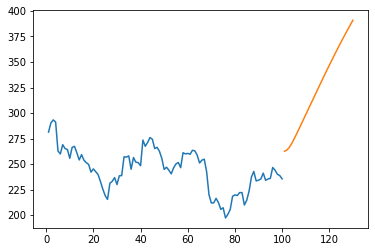

In [46]:
plt.plot(day_new,scaler.inverse_transform(df2[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

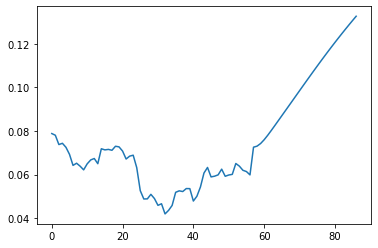

In [47]:
df3=df2.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [48]:
df3=scaler.inverse_transform(df3).tolist()

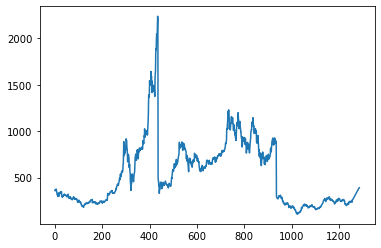

In [49]:
plt.plot(df3)